In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 

In [20]:
image = cv2.imread("../../images/trex.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

### Average

In [13]:
kernel = np.ones((5,5),np.float32)/25
kernel

array([[ 0.04,  0.04,  0.04,  0.04,  0.04],
       [ 0.04,  0.04,  0.04,  0.04,  0.04],
       [ 0.04,  0.04,  0.04,  0.04,  0.04],
       [ 0.04,  0.04,  0.04,  0.04,  0.04],
       [ 0.04,  0.04,  0.04,  0.04,  0.04]], dtype=float32)

In [29]:
dst = cv2.filter2D(image,-1,kernel)

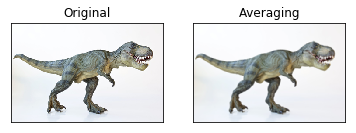

In [28]:
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

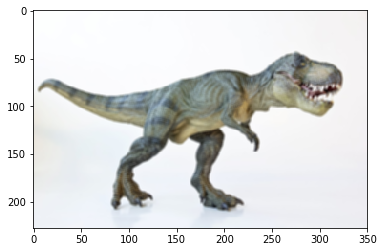

In [30]:
plt.imshow(dst)

## 02

In [26]:
kernel = np.float32([[1, 1, 1],
                     [1, 1, 1],
                    [1, 1, 1]])/9
kernel

array([[ 0.11111111,  0.11111111,  0.11111111],
       [ 0.11111111,  0.11111111,  0.11111111],
       [ 0.11111111,  0.11111111,  0.11111111]], dtype=float32)

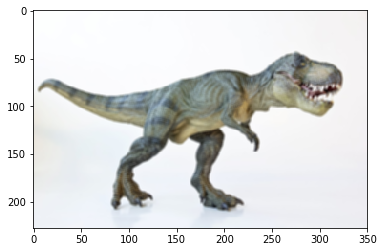

In [27]:
dst = cv2.filter2D(image,-1,kernel)
plt.imshow(dst)

[[ 0.00826446  0.00826446  0.00826446  0.00826446  0.00826446  0.00826446
   0.00826446  0.00826446  0.00826446  0.00826446  0.00826446]
 [ 0.00826446  0.00826446  0.00826446  0.00826446  0.00826446  0.00826446
   0.00826446  0.00826446  0.00826446  0.00826446  0.00826446]
 [ 0.00826446  0.00826446  0.00826446  0.00826446  0.00826446  0.00826446
   0.00826446  0.00826446  0.00826446  0.00826446  0.00826446]
 [ 0.00826446  0.00826446  0.00826446  0.00826446  0.00826446  0.00826446
   0.00826446  0.00826446  0.00826446  0.00826446  0.00826446]
 [ 0.00826446  0.00826446  0.00826446  0.00826446  0.00826446  0.00826446
   0.00826446  0.00826446  0.00826446  0.00826446  0.00826446]
 [ 0.00826446  0.00826446  0.00826446  0.00826446  0.00826446  0.00826446
   0.00826446  0.00826446  0.00826446  0.00826446  0.00826446]
 [ 0.00826446  0.00826446  0.00826446  0.00826446  0.00826446  0.00826446
   0.00826446  0.00826446  0.00826446  0.00826446  0.00826446]
 [ 0.00826446  0.00826446  0.00826446  0.

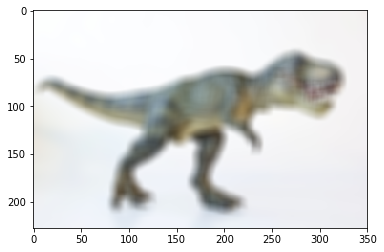

In [35]:
size = 11
kernel = np.ones((size,size),np.float32)/(size*size)
print(kernel)
dst = cv2.filter2D(image,-1,kernel)
plt.imshow(dst)

### 03

In [4]:
src = np.float32([[0,0,0,0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0,0,0,0],
                    [0,0,90,90,90,90,90,0,0,0],
                    [0,0,90,0,90,90,90,0,0,0],
                    [0,0,90,90,90,90,90,0,0,0],
                    [0,0,90,90,90,90,90,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0],
                    [0,90,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0],])


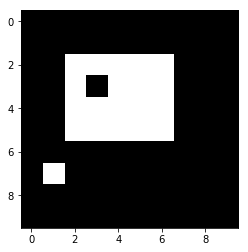

In [5]:
plt.imshow(src,cmap='gray')

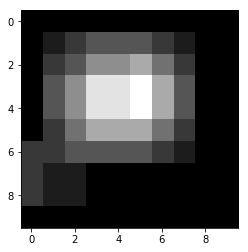

In [6]:
kernel = np.float32([[1, 1, 1],
                     [1, 1, 1],
                    [1, 1, 1]])/9
dst = cv2.filter2D(src,-1,kernel)
plt.imshow(dst,cmap='gray')


[[254 254 254 ..., 239 242 247]
 [254 254 254 ..., 239 242 247]
 [254 254 254 ..., 239 242 247]
 ..., 
 [243 239 238 ..., 237 238 243]
 [242 238 237 ..., 237 238 243]
 [238 232 231 ..., 237 238 243]]


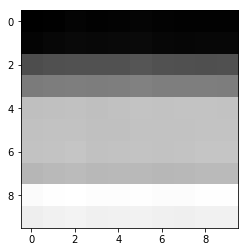

In [50]:
kernel = np.hstack(cv2.medianBlur(image, 3))
print(kernel)
dst = cv2.filter2D(src,-1,kernel)
plt.imshow(dst,cmap='gray')

### Gaussian

http://subsurfwiki.org/wiki/Gaussian_filter

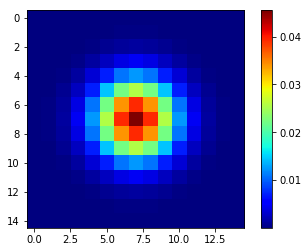

In [17]:
def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = np.mgrid[-size:size+1, -size_y:size_y+1]
    g = np.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g / g.sum()
 
# Make the Gaussian by calling the function
gaussian_kernel_array = gaussian_kernel(7)
 
plt.imshow(gaussian_kernel_array, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

In [18]:
gaussian_kernel_array.shape

(15, 15)

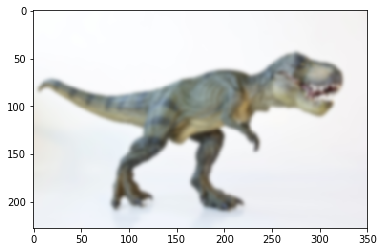

In [22]:
dst = cv2.filter2D(image,-1,gaussian_kernel_array)
plt.imshow(dst)